# Lab Natural Language Techniques

In [1]:
import pandas as pd 
import matplotlib as plt
import seaborn as sb
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [2]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [3]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df=clothingdf[['Title', 'Review Text', 'Rating', 'Division Name', 'Department Name']]

In [5]:
df.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [6]:
df.columns = df.columns.str.lower() 
df

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [8]:
df.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
df.shape

(23486, 5)

In [10]:
df_group_by=df.groupby(['division name', 'department name']).agg({'rating':'mean'})

In [11]:
df_group_by.sort_values('rating')

rating
division name  department name          
General Petite Trend            3.782609
General        Trend            3.822917
General Petite Dresses          4.133256
General        Tops             4.148749
               Dresses          4.163003
General Petite Tops             4.216469
General        Jackets          4.240310
General Petite Intimate         4.240343
General        Bottoms          4.268686
Initmates      Intimate         4.286285
General Petite Jackets          4.304910
               Bottoms          4.329356

<AxesSubplot:ylabel='division name,department name'>

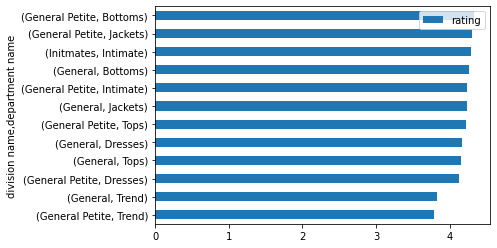

In [12]:
df_group_by.sort_values(by=['rating']).plot(kind='barh')

In [13]:
df.head()

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [30]:
pd.set_option("display.max_colwidth", None)
df[['review text']].head()

,review text
0,Absolutely wonderful - silky and sexy and comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!


In [59]:
df[['review text']]

,review text
0,Absolutely wonderful - silky and sexy and comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite."
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
...,...
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.
23482,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok."
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great."
23484,"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"


In [74]:
testimonial=TextBlob(df['review text'].loc[44]).sentiment # Negative (polarity suppose to be close to -1)
testimonial

Sentiment(polarity=-0.04637445887445885, subjectivity=0.4233766233766234)

In [53]:
testimonial2=TextBlob(df['review text'].loc[1256]).sentiment # Positive (polarity suppose to be close to 1)
testimonial2

Sentiment(polarity=0.6848958333333333, subjectivity=0.8166666666666667)

In [70]:
testimonial3=TextBlob(df['review text'].loc[61]).sentiment # Neutral (polarity suppose to be close to 0)
testimonial3

Sentiment(polarity=0.03125000000000001, subjectivity=0.5791666666666666)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [34]:
TextBlob(df['review text'].loc[2457]).sentences

[Sentence("I originally ordered the peach stripe tee in my normal size, medium."),
 Sentence("after going to the store and trying another color on in a small i realized i should have sized down."),
 Sentence("i have since purchased the blue stripe in the smaller size."),
 Sentence("i love the fit and the colorful stripes of both."),
 Sentence("great light-weight, casual tee."),
 Sentence("i love the button details on the shoulder.")]

In [19]:
# df=df.dropna(subset=['review text'], inplace=True)
# df.info()

# We do not need to drop null values of the review text column, and it has already 22641 rows

In [20]:
df['polarity'] = df['review text'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)

In [21]:
df.head()

,title,review text,rating,division name,department name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comfortable,4,Initmates,Intimate,0.633333
1,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,General,Dresses,0.339583
2,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,General,Tops,0.512891


In [22]:
df.describe()

,rating,polarity
count,23486.000000,23486.000000
mean,4.196032,0.240835
std,1.110031,0.179603
min,1.000000,-0.975000
25%,4.000000,0.125505
50%,5.000000,0.232450
75%,5.000000,0.345229
max,5.000000,1.000000


In [23]:
df_polarity_group_min=df.groupby(['division name', 'department name']).agg({'polarity':'min'})

In [24]:
df_polarity_group_min.sort_values('polarity')

polarity
division name  department name          
General        Tops            -0.975000
               Dresses         -0.916667
               Jackets         -0.750000
General Petite Tops            -0.700000
               Intimate        -0.575000
               Jackets         -0.562500
General        Bottoms         -0.533333
General Petite Dresses         -0.400000
Initmates      Intimate        -0.392333
General        Trend           -0.270833
General Petite Bottoms         -0.257778
               Trend           -0.083333

<AxesSubplot:ylabel='division name,department name'>

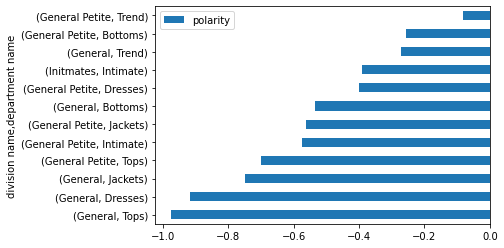

In [25]:
df_polarity_group_min.sort_values(by=['polarity']).plot(kind='barh')

In [26]:
df_polarity_group_mean=df.groupby(['division name', 'department name']).agg({'polarity':'mean'})

In [27]:
df_polarity_group_mean.sort_values('polarity')

polarity
division name  department name          
General Petite Trend            0.195925
General        Trend            0.201861
               Jackets          0.229420
General Petite Intimate         0.233349
               Jackets          0.236150
General        Bottoms          0.236661
               Tops             0.237740
General Petite Dresses          0.242336
General        Dresses          0.243619
Initmates      Intimate         0.243976
General Petite Tops             0.245305
               Bottoms          0.250595

<AxesSubplot:ylabel='division name,department name'>

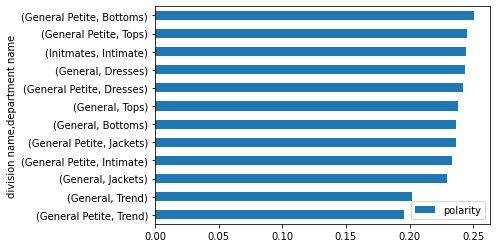

In [28]:
df_polarity_group_mean.sort_values(by=['polarity']).plot(kind='barh')